In [1]:
import scipy.io
import numpy as np

In [2]:
design_matrix = scipy.io.loadmat('Orange_02_2021_design_matrix_only.mat')['Orange_02_2021_design_matrix']

In [3]:
design_matrix.shape

(2860, 10)

In [4]:
def time_shift_matrix(time_series, before, after):
    padded_time_series = np.pad(time_series, (before, after))
    time_shifts = []
    for i in range(before+after):
        time_shifts.append(padded_time_series[i:-(before+after)+i])
    return time_shifts

In [5]:
before = 3
after = 3
time_indices = [1, 2, 3]

full_design_matrix = []
for i in range(design_matrix.shape[-1] -1):
    if i in time_indices:
        full_design_matrix.extend(time_shift_matrix(design_matrix[:, i], before, after))
    else:
        full_design_matrix.append(design_matrix[:, i])
full_design_matrix = np.stack(full_design_matrix)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha = 1.0
ridge = Ridge(alpha)
scores = cross_val_score(ridge, full_design_matrix, design_matrix[:, -1], cv=5)
print("%0.2f r^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ValueError: Found input variables with inconsistent numbers of samples: [24, 2860]

In [25]:
full_design_matrix.shape
#print(full_design_matrix[24,:])
np.any(full_design_matrix<0)

False

As is, full_design_matrix isnt the correct size for what my understanding of what padding/shifting should be yielding. There are 9 behavioral events as covariates we want to include, 3 pre + 3 post + 1 original would be 7 columns for each behavior x 9 behaviors = 63 input columns (also it looks like the dimensions from the original matrix load in have been inverted to create the final full_design_matrix, but for model input each feature should be a column (in line with origianl read in of design matrix))?

Since I can barely maneuver in python lol, I just made the shifted input design matrix, and separate Zdff dependent variable vector in Matlab (same Dropbox folder as the original you already loaded), and am using those here. 

In [78]:
import numpy as np
import scipy.io
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

design_matrix = scipy.io.loadmat('Time_shifted_matrices_for_python.mat')['time_shifted_input_design_matrix']
target_Zdff_values=scipy.io.loadmat('Time_shifted_matrices_for_python.mat')['Zdff_values']
alpha = 0.01 #anything as high as 1 gives similar coefficients; 10 they go down
ridge = Ridge(alpha)
ridge.fit(design_matrix,target_Zdff_values)
ridge.get_params(deep=True)
ridge.predict(design_matrix)
ridge.score(design_matrix,target_Zdff_values,sample_weight=None)
#ridge.set_params(alpha=alpha,...

0.0481263268437353

In [79]:
ridge.coef_

array([[-0.11819626,  0.58017047,  0.12457593, -0.13062493,  0.07317258,
         0.34220471, -0.02586388,  0.08325408, -0.07866899,  0.28338938,
         0.54798042, -0.29424048, -0.13284244,  0.01092767,  0.52004667,
         0.17536221,  0.24365933, -0.03028621,  0.71836838,  0.57626166,
        -0.06931744, -0.12030324,  0.11292861,  0.0148113 ,  0.47040026,
        -0.0218427 ,  0.07038764,  0.52441798,  0.45440312, -0.24677668,
        -0.04643805, -0.13175708, -0.09289353,  0.47182645,  0.00626683,
        -0.03340028,  0.05740096,  0.34106924, -0.1871613 , -0.18885741,
        -0.0779351 ,  0.00432809,  0.49256234, -0.01810087,  0.06824016,
        -0.27166661,  0.16648053,  0.01285646, -0.08034167,  0.54082455,
         0.05519139,  0.27396843,  0.10621292,  0.08464784]])

In [113]:
np.shape(design_matrix)

(2860, 54)

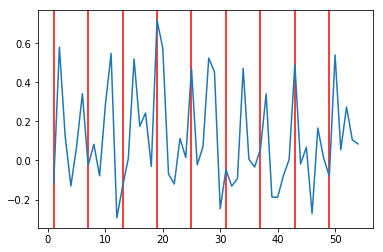

In [114]:
import matplotlib.pyplot as plt
x=ridge.coef_
z=np.transpose(x)
xpoints = (1,7,13,19,25,31,37,43,49)
for p in xpoints:

    plt.axvline(p,color='r') #vertical lines should be actual event for each feature (design matrix thenn includes 5 shifted of each plus the original, 6 reps per feature total)
plt.plot(y,z)
plt.show();


In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge, design_matrix, target_Zdff_values, cv=5)
print("%0.2f r^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.03 r^2 with a standard deviation of 0.07
